In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Blinkit_data.csv')
print(df.head())

  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
1      Medium  Supermarket Type2         0.008596     

In [6]:
df.describe(include = "all")

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
count,8523,8523,8523,8523.000000,8523,8523,8523,8523,8523.000000,8523.000000,8523.000000,8523.000000
unique,2,1559,16,NaN,10,3,3,4,NaN,NaN,NaN,NaN
top,Low Fat,FDW13,Fruits and Vegetables,NaN,OUT027,Tier 3,Medium,Supermarket Type1,NaN,NaN,NaN,NaN
freq,5517,10,1232,NaN,935,3350,3631,5577,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2016.450546,NaN,NaN,NaN,NaN,0.066132,10.650590,140.992783,3.965857
std,NaN,NaN,NaN,3.189396,NaN,NaN,NaN,NaN,0.051598,6.431899,62.275067,0.605651
min,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,31.290000,1.000000
25%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,0.026989,6.650000,93.826500,4.000000
50%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,0.053931,11.000000,143.012800,4.000000
75%,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,0.094585,16.000000,185.643700,4.200000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [6]:
df.count()

Item Fat Content             8523
Item Identifier              8523
Item Type                    8523
Outlet Establishment Year    8523
Outlet Identifier            8523
Outlet Location Type         8523
Outlet Size                  8523
Outlet Type                  8523
Item Visibility              8523
Item Weight                  8523
Sales                        8523
Rating                       8523
dtype: int64

In [10]:
print(df['Item Fat Content'].unique())


['Regular' 'Low Fat']



KPI's Requirements


In [32]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
no_of_item = df['Sales'].count()
avg_rating = df['Sales'].mean()

print(f"Total Sales : {total_sales:,.2f}")
print(f"Average Sales : {avg_sales:,.2f}")
print(f"No of Item : {no_of_item:,.2f}")
print(f"Average Rating : {avg_rating:,.2f}")

Total Sales : 1,201,681.49
Average Sales : 140.99
No of Item : 8,523.00
Average Rating : 140.99


Charts

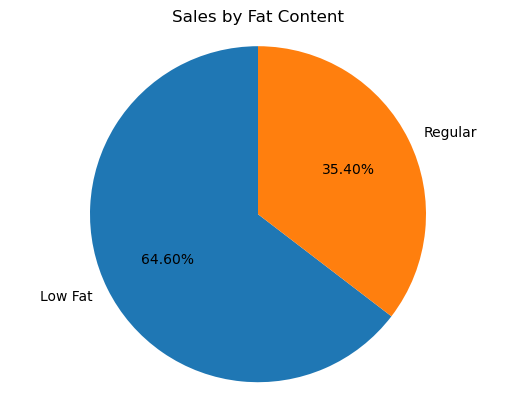

In [38]:
#Total Sales by Fat Conetent
#index is like a label
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat , labels = sales_by_fat.index , autopct = '%.2f%%' , startangle = 90)
plt.title('Sales by Fat Content')
plt.axis('equal') #Makes the pie chart a perfect circle
plt.show()

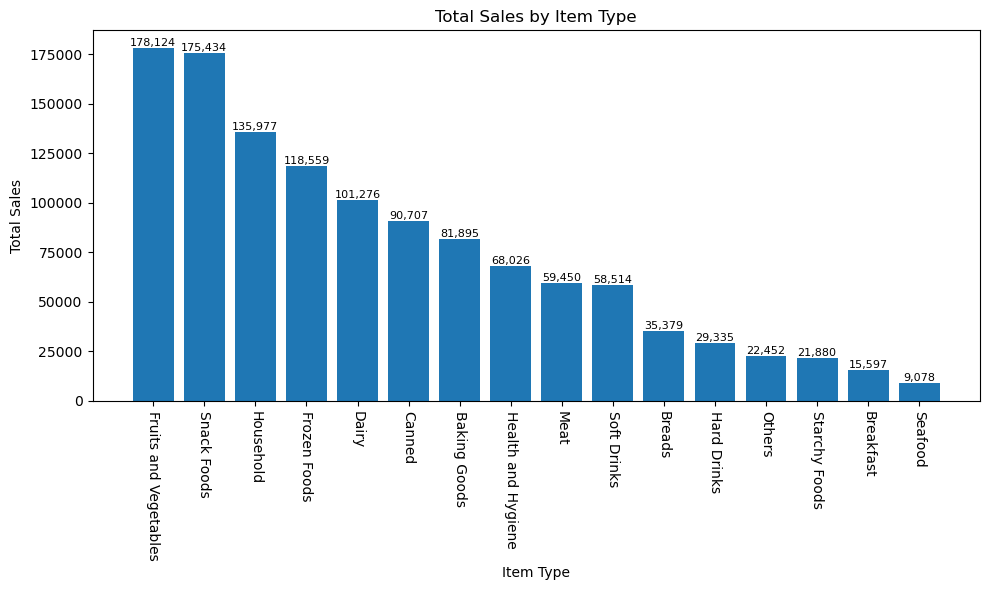

In [54]:
#Item Type by Sales
sales_by_item = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6)) #Creates a figure of width 10 inches and height 6 inches
bars= plt.bar(sales_by_item.index , sales_by_item.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout() #Automatically adjusts spacing
plt.show()

<Figure size 800x500 with 0 Axes>

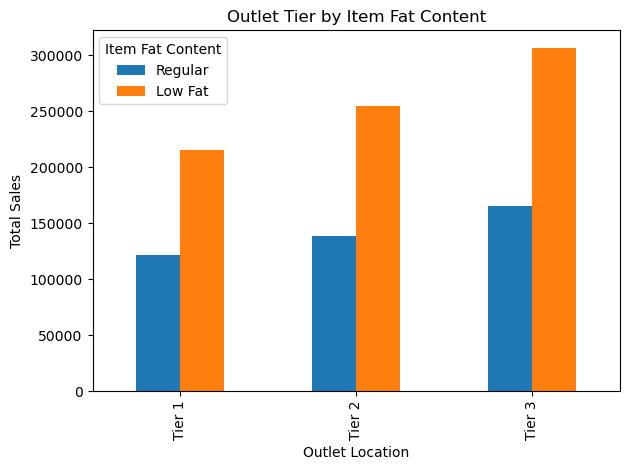

In [58]:
#Fat Content by outletfor Total Sales
grouped = df.groupby(['Outlet Location Type' , 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]
plt.figure(figsize = (8,5))
ax = grouped.plot(kind = 'bar' , title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()


In [55]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

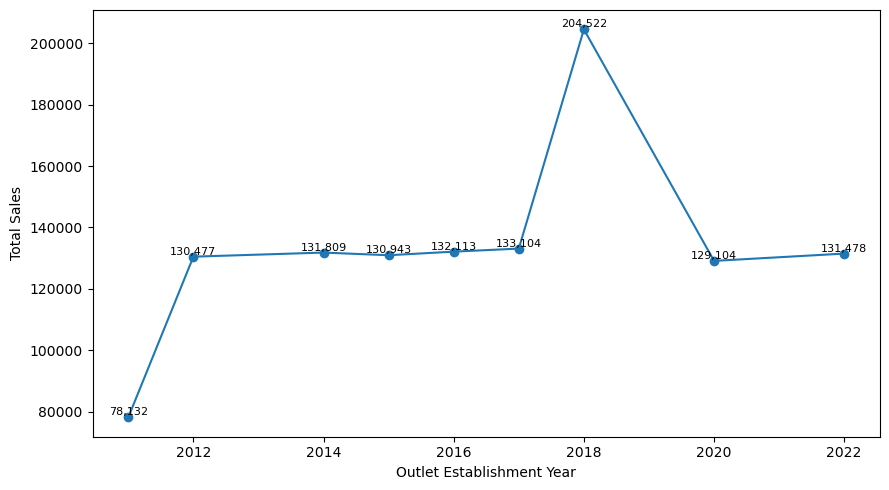

In [64]:
#Total Sales by outlet Establishment
outlet = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(outlet.index , outlet.values , marker='o' , linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')

for x , y in zip(outlet.index , outlet.values):
        plt.text(x,y,f'{y:,.0f}', ha='center' , va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

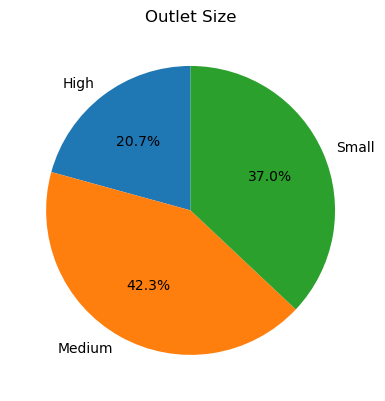

In [69]:
#Sales by outlet Size
outlet_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,5))
plt.pie(outlet_size , labels = outlet_size.index , autopct = '%1.1f%%' , startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()